In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.gridspec import GridSpec
from collections import OrderedDict
# Set the style for publication-quality plots
# plt.style.use('seaborn-v0_8-whitegrid')
# sns.set_context("paper", font_scale=1.2)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 'medium'

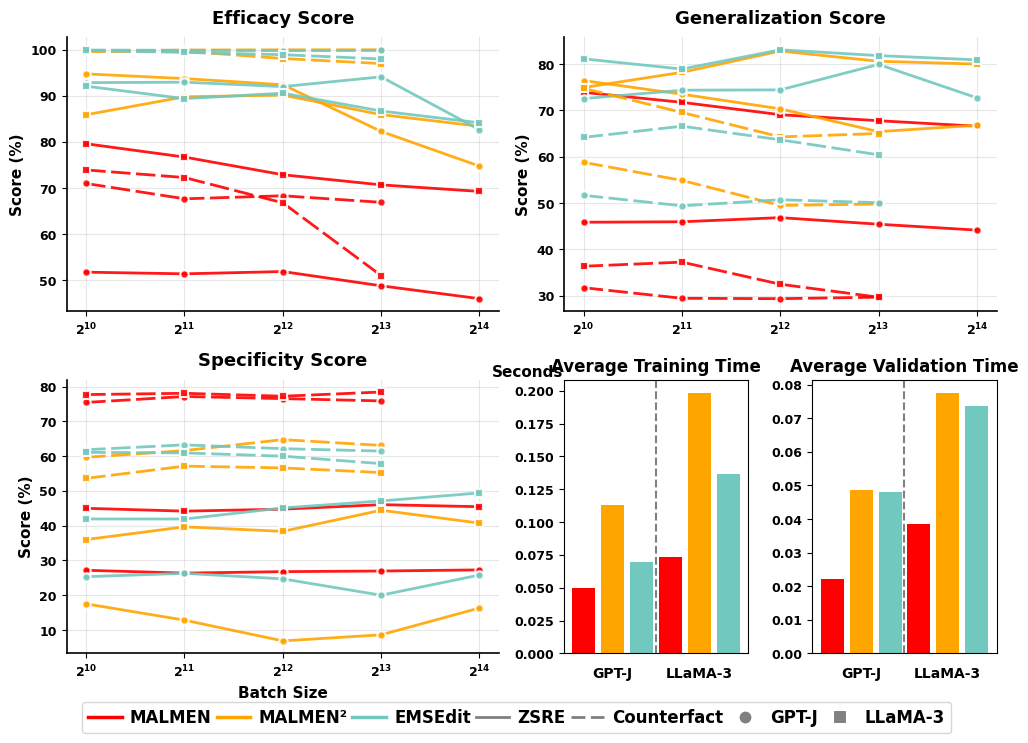

In [ ]:

# Define the data
# GPT-J ZSRE data
gptj_zsre = {
    "1024": {
        "MALMEN": {"ES": 51.791, "GS": 45.841, "LS": 27.184, "train_time": 50.89, "val_time": 22.56},
        r"MALMEN$^2$": {"ES": 94.74, "GS": 76.46, "LS": 17.53, "train_time": 115.62, "val_time": 49.77},
        "EMSEdit": {"ES": 92.84, "GS": 72.57, "LS": 25.34, "train_time": 71.18, "val_time": 49.17}
    },
    "2048": {
        "MALMEN": {"ES": 51.43, "GS": 45.94, "LS": 26.37, "train_time": 100.01, "val_time": 41.64},
        r"MALMEN$^2$": {"ES": 93.72, "GS": 73.52, "LS": 12.85, "train_time": 195.36, "val_time": 84.56},
        "EMSEdit": {"ES": 92.94, "GS": 74.38, "LS": 26.31, "train_time": 130.06, "val_time": 89.29}
    },
    "4096": {
        "MALMEN": {"ES": 51.925, "GS": 46.838, "LS": 26.791, "train_time": 196.60, "val_time": 83.62},
        r"MALMEN$^2$": {"ES": 92.39, "GS": 70.35, "LS": 6.89, "train_time": 393.01, "val_time": 166.30},
        "EMSEdit": {"ES": 91.98, "GS": 74.45, "LS": 24.71, "train_time": 258.54, "val_time": 163.45}
    },
    "8192": {
        "MALMEN": {"ES": 48.838, "GS": 45.413, "LS": 26.975, "train_time": 401.76, "val_time": 165.81},
        r"MALMEN$^2$": {"ES": 82.28, "GS": 65.42, "LS": 8.63, "train_time": 813.05, "val_time": 333.56},
        "EMSEdit": {"ES": 94.10, "GS": 79.96, "LS":20.02, "train_time": 541.12, "val_time": 347.28}
    },
    "16384": {
        "MALMEN": {"ES": 46.051, "GS": 44.137, "LS": 27.292, "train_time": 816.64, "val_time": 327.69},
        r"MALMEN$^2$": {"ES": 74.76, "GS": 66.81, "LS": 16.34, "train_time": 1625.80, "val_time":683.27 },
        "EMSEdit": {"ES": 82.66, "GS": 72.73, "LS": 25.81, "train_time": 1084.44, "val_time": 682.11}
    }
}

# Llama3 ZSRE data
llama3_zsre = {
    "1024": {
        "MALMEN": {"ES": 79.603, "GS": 73.918, "LS": 44.995, "train_time": 70.24, "val_time": 33.78},
        r"MALMEN$^2$": {"ES": 85.89, "GS": 74.96, "LS": 36.02, "train_time": 143.89, "val_time": 72.71},
        "EMSEdit": {"ES": 92.07, "GS": 81.16, "LS": 41.93, "train_time": 139.87, "val_time": 72.40}
    },
    "2048": {
        "MALMEN": {"ES": 76.72, "GS": 71.76, "LS": 44.18, "train_time": 139.32, "val_time": 68.62},
        r"MALMEN$^2$": {"ES": 89.77, "GS": 78.25, "LS": 39.66, "train_time": 291.79, "val_time": 156.49},
        "EMSEdit": {"ES": 89.38, "GS": 78.95, "LS":41.92, "train_time": 207.45, "val_time": 148.52}
    },
    "4096": {
        "MALMEN": {"ES": 72.895, "GS": 69.084, "LS": 44.748, "train_time": 282.76, "val_time": 137.39},
        r"MALMEN$^2$": {"ES": 90.15, "GS": 82.84, "LS": 38.37, "train_time": 589.05, "val_time": 290.47},
        "EMSEdit": {"ES": 90.56, "GS": 83.12, "LS": 45.10, "train_time": 440.58, "val_time": 299.02}
    },
    "8192": {
        "MALMEN": {"ES": 70.703, "GS": 67.787, "LS": 46.045, "train_time": 592.24, "val_time": 289.42},
        r"MALMEN$^2$": {"ES": 85.91, "GS": 80.64, "LS": 44.44, "train_time": 1172.86, "val_time": 590.49},
        "EMSEdit": {"ES": 86.69, "GS": 81.86, "LS": 47.11, "train_time":904.22, "val_time": 587.66}
    },
    "16384": {
        "MALMEN": {"ES": 69.281, "GS": 66.593, "LS": 45.455, "train_time": 1208.19, "val_time": 631.56},
        r"MALMEN$^2$": {"ES": 83.40, "GS": 80.03, "LS": 40.74, "train_time": 3255.5, "val_time": 1271.57},
        "EMSEdit": {"ES": 84.15, "GS": 80.94, "LS": 49.41, "train_time": 1736.77, "val_time": 1208.46}
    }
}

# GPT-J Counterfact data
gptj_counterfact = {
    "1024": {
        "MALMEN": {"ES": 71.00, "GS": 31.69, "LS": 75.42, "train_time": 47.32, "val_time": 20.16},
        r"MALMEN$^2$": {"ES": 99.61, "GS": 58.79, "LS": 59.65, "train_time": 95.61, "val_time": 37.52},
        "EMSEdit": {"ES": 99.90, "GS":51.66, "LS": 61.83, "train_time": 61.09, "val_time": 37.66}
    },
    "2048": {
        "MALMEN": {"ES": 67.68, "GS": 29.40, "LS": 77.12, "train_time": 91.00, "val_time": 37.84},
        r"MALMEN$^2$": {"ES": 99.90, "GS": 54.88, "LS": 61.59, "train_time": 180.09, "val_time": 70.25},
        "EMSEdit": {"ES": 99.85, "GS": 49.39, "LS": 63.23, "train_time": 115.48, "val_time": 68.65}
    },
    "4096": {
        "MALMEN": {"ES": 68.34, "GS": 29.32, "LS": 76.52, "train_time": 179.38, "val_time": 75.00},
        r"MALMEN$^2$": {"ES": 99.95, "GS": 49.48, "LS": 64.73 , "train_time": 354.91, "val_time": 136.15},
        "EMSEdit": {"ES": 99.76, "GS": 50.70, "LS": 62.13, "train_time": 219, "val_time": 132.39}
    },
    "8192": {
        "MALMEN": {"ES": 66.92, "GS": 29.64, "LS": 75.86, "train_time": 364.87, "val_time": 147.13},
        r"MALMEN$^2$": {"ES": 99.96, "GS": 49.77, "LS": 63.07, "train_time": 718.62, "val_time": 267.57},
        "EMSEdit": {"ES": 99.82, "GS": 50.07, "LS": 61.44, "train_time":  447.10, "val_time": 267.87}
    }
}

# Llama3 Counterfact data
llama3_counterfact = {
    "1024": {
        "MALMEN": {"ES": 73.93, "GS": 36.33, "LS": 77.68, "train_time": 64.40, "val_time": 27.92},
        r"MALMEN$^2$": {"ES": 99.61, "GS": 74.78, "LS": 53.60, "train_time": 149.28, "val_time": 64.72},
        "EMSEdit": {"ES": 99.81, "GS": 64.19, "LS": 61.08, "train_time": 92.13, "val_time": 65.99}
    },
    "2048": {
        "MALMEN": {"ES": 72.29, "GS": 37.22, "LS": 78.05, "train_time":128.33, "val_time": 57.72},
        r"MALMEN$^2$": {"ES": 99.64, "GS": 69.57, "LS": 57.12, "train_time": 257.43, "val_time": 108.80},
        "EMSEdit": {"ES": 99.38, "GS": 66.60, "LS": 60.92, "train_time": 179.61, "val_time": 109.32}
    },
    "4096": {
        "MALMEN": {"ES": 66.81, "GS": 32.44, "LS": 77.21, "train_time": 264.68, "val_time": 113.13},
        r"MALMEN$^2$": {"ES": 98.07, "GS": 64.29 , "LS": 56.60, "train_time":522.28, "val_time": 217.43},
        "EMSEdit": {"ES": 98.90, "GS":63.66, "LS": 59.98, "train_time": 343.89, "val_time": 222.37}
    },
    "8192": {
        "MALMEN": {"ES": 51.06, "GS": 29.63, "LS": 78.42, "train_time":529.04, "val_time": 223.38},
        r"MALMEN$^2$": {"ES": 96.97 , "GS": 65.02, "LS": 55.26, "train_time": 1041.43, "val_time": 444.44},
        "EMSEdit": {"ES": 97.96, "GS": 60.42, "LS": 57.83, "train_time": 694.02, "val_time": 436.18}
    }
}

def create_dataframe(dataset, model_name, dataset_name):
    """Convert nested dictionary to DataFrame for easier plotting"""
    rows = []
    for context_size, methods in dataset.items():
        for method_name, metrics in methods.items():
            row = {
                'Model': model_name,
                'Dataset': dataset_name,
                'Batch Size': int(context_size),
                'Method': method_name,
                'Efficacy': metrics['ES'],
                'Generalization': metrics['GS'],
                'Specificity': metrics['LS'],
                'Train Time': metrics['train_time'],
                'Val Time': metrics['val_time']
            }
            rows.append(row)
    return pd.DataFrame(rows)

# Create a combined DataFrame
df_list = [
    create_dataframe(gptj_zsre, 'GPT-J', 'ZSRE'),
    create_dataframe(llama3_zsre, 'LLaMA-3', 'ZSRE'),
    create_dataframe(gptj_counterfact, 'GPT-J', 'Counterfact'),
    create_dataframe(llama3_counterfact, 'LLaMA-3', 'Counterfact')
]
df = pd.concat(df_list)
# 添加平均时间列
df['Avg Train Time'] = df['Train Time'] / df['Batch Size']
df['Avg Val Time'] = df['Val Time'] / df['Batch Size']
avg_train_times = df.groupby(["Model", "Method"])["Avg Train Time"].mean().reset_index()
avg_val_times = df.groupby(["Model", "Method"])["Avg Val Time"].mean().reset_index()



def plot_comprehensive_comparison(df): # Added df as argument
    """Create a comprehensive plot showing performance across models, methods, and context sizes"""
    # Set up the figure
    fig = plt.figure(figsize=(12, 8)) # Increased size for better legend spacing
    gs = GridSpec(2, 2, figure=fig, hspace=0.25, wspace=0.15) # Added spacing

    # Define consistent dataset names
    datasets_to_plot = ["ZSRE", "Counterfact"] # Match DataFrame values
    models_to_plot = ["GPT-J", "LLaMA-3"]
    methods_to_plot = ['MALMEN', r"MALMEN$^2$", 'EMSEdit']

    # --- Define NEW mapping ---
    # Methods -> Colors
    # "red", "orange", "#6A5ACD"
    color_map = {
        "MALMEN": "red",
        r"MALMEN$^2$": "orange",
        "EMSEdit": "#71c8bf"
    }

    # Datasets -> Linestyles
    linestyle_map = {
        "ZSRE": "-",      # Solid line
        "Counterfact": (0, (7, 2)) # Dashed line
    }
    # Models -> Markers
    marker_map = {
        "GPT-J": "o", # Circle
        "LLaMA-3": "s"  # Square
    }


    def setup_axis(ax, title, ylabel=None):
        """统一设置坐标轴样式"""
        ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
        ax.set_xscale('log', base=2)
        if ylabel:
            ax.set_ylabel(ylabel, fontsize=11)
        ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.grid(True, which='minor', linestyle=':', alpha=0.2, linewidth=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)

    def plot_metric(ax, metric_name, title, ylabel):
        """绘制单个指标"""
        for dataset in datasets_to_plot:
            dataset_data = df[df['Dataset'] == dataset]
            for method in methods_to_plot:
                for model in models_to_plot:
                    method_data = dataset_data[
                        (dataset_data['Model'] == model) &
                        (dataset_data['Method'] == method)
                    ].sort_values('Batch Size')

                    if not method_data.empty:
                        ax.plot(
                            method_data['Batch Size'],
                            method_data[metric_name],
                            color=color_map[method],
                            linestyle=linestyle_map[dataset],
                            marker=marker_map[model],
                            markersize=6,
                            linewidth=2,
                            markeredgewidth=1.5,
                            markeredgecolor='white',
                            alpha=0.9
                        )
        setup_axis(ax, title, ylabel)

    # 绘制三个性能指标
    ax1 = fig.add_subplot(gs[0, 0])
    plot_metric(ax1, 'Efficacy', 'Efficacy Score', 'Score (%)')

    ax2 = fig.add_subplot(gs[0, 1])
    plot_metric(ax2, 'Generalization', 'Generalization Score', 'Score (%)')

    ax3 = fig.add_subplot(gs[1, 0])
    plot_metric(ax3, 'Specificity', 'Specificity Score', 'Score (%)')
    ax3.set_xlabel('Batch Size', fontsize=11, fontweight='bold')


    # --- Plot 4: Training Time ---
    inner_gs = gs[1, 1].subgridspec(1, 2, wspace=0.35)
    df["Label"] = df["Model"] + "-" + df["Method"]
    colors = [color_map[method] for method in df["Method"]]
    # 2. 分别创建子图
    ax4_train = fig.add_subplot(inner_gs[0, 0])
    ax4_val = fig.add_subplot(inner_gs[0, 1])

    ax4_train.bar(df["Label"], df["Avg Train Time"], color=colors)
    ax4_train.axvline(2.5, color='gray', linestyle='--')
    ax4_train.set_xticks([])
    ax4_train.text(2.5/2 - 0.25, -0.01, "GPT-J", ha='center', va='top', transform=ax4_train.transData)
    ax4_train.text(2.5*2- 1, -0.01, "LLaMA-3", ha='center', va='top', transform=ax4_train.transData)
    ax4_train.set_ylabel("Seconds", labelpad=-35, loc='top',rotation=0)
    ax4_train.set_title("Average Training Time")
    # 子图2：Avg Val Time

    ax4_val.bar(df["Label"], df["Avg Val Time"], color=colors)
    ax4_val.set_title("Average Validation Time")  
    # ax4_val.set_ylabel("Seconds")
    ax4_val.axvline(2.5, color='gray', linestyle='--')
    # ax4_val.tick_params(axis='x', rotation=45)
    ax4_val.set_xticks([])
    ax4_val.text(2.5/2 - 0.25, -0.004, "GPT-J", ha='center', va='top', transform=ax4_val.transData)
    ax4_val.text(2.5*2 - 1, -0.004, "LLaMA-3", ha='center', va='top', transform=ax4_val.transData)
    # ax4_val.set_ylabel("Seconds", labelpad=-30, loc='top',rotation=0)

    # --- Create a single shared legend ---
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color=color_map["MALMEN"], linewidth=2.5, label='MALMEN'),
        Line2D([0], [0], color=color_map[r"MALMEN$^2$"], linewidth=2.5, label='MALMEN²'),
        Line2D([0], [0], color=color_map["EMSEdit"], linewidth=2.5, label='EMSEdit'),
        Line2D([0], [0], color='gray', linestyle='-', linewidth=2, label='ZSRE'),
        Line2D([0], [0], color='gray', linestyle=(0, (5, 2)), linewidth=2, label='Counterfact'),
        Line2D([0], [0], marker='o', color='gray', linestyle='None', 
                markersize=10, markeredgewidth=1.5, markeredgecolor='white', label='GPT-J'),
        Line2D([0], [0], marker='s', color='gray', linestyle='None', 
                markersize=10, markeredgewidth=1.5, markeredgecolor='white', label='LLaMA-3'),
    ]

    # Place legend outside the plots
    fig.legend(
        handles=legend_elements,
        loc='lower center',            # ⬅️ 放在图正下方
        bbox_to_anchor=(0.5, 0.0),   # ⬅️ 横向中心对齐，向下移动一些
        fontsize=12,
        ncol=7,                        # ⬅️ 两列
        frameon=True,                # 可选：去掉边框
        columnspacing=0.3,            # 列间距
        handletextpad=0.5             # 图例图标和文字间距
    )


    # Adjust layout to prevent overlap and make space for legend
    # plt.tight_layout(rect=[0, 2,0,0]) # Leave space: rect=[left, bottom, right, top]

    # Set title for the entire figure
    # fig.suptitle('Comprehensive Performance Analysis', fontsize=18, y=0.99) # Adjust main title position

    return fig

# Generate and show the comprehensive figure
comprehensive_fig = plot_comprehensive_comparison(df)
plt.savefig("./figs/supp_batch_res.pdf" ,bbox_inches='tight')



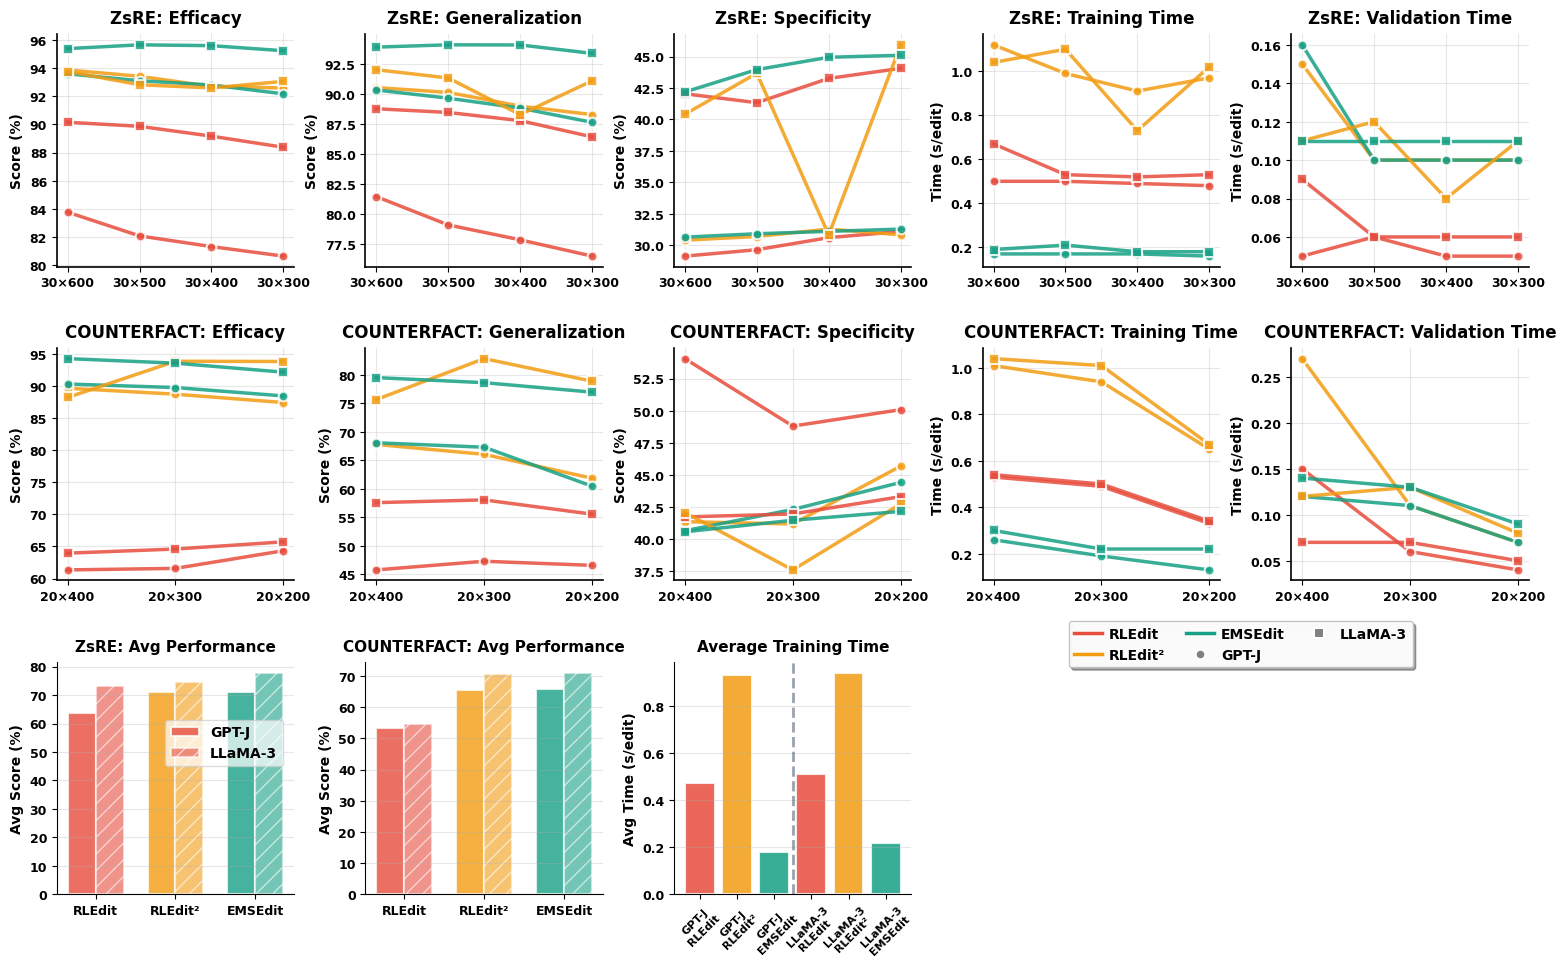

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

# 设置全局样式
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 9

# ZsRE 数据
zsre_data = {
    'Batch×Seq': ['30×600', '30×500', '30×400', '30×300'],
    'GPT-J': {
        'RLEdit': {
            'Eff': [83.76, 82.07, 81.31, 80.63],
            'Gen': [81.47, 79.11, 77.87, 76.51],
            'Spe': [29.13, 29.64, 30.60, 31.09],
            'Train': [0.50, 0.50, 0.49, 0.48],
            'Val': [0.05, 0.06, 0.05, 0.05]
        },
        'RLEdit²': {
            'Eff': [93.88, 93.43, 92.71, 92.60],
            'Gen': [90.54, 90.14, 89.00, 88.29],
            'Spe': [30.40, 30.69, 31.28, 30.82],
            'Train': [1.12, 0.99, 0.91, 0.97],
            'Val': [0.15, 0.10, 0.10, 0.10]
        },
        'EMSEdit': {
            'Eff': [93.61, 93.11, 92.81, 92.18],
            'Gen': [90.34, 89.66, 88.83, 87.65],
            'Spe': [30.64, 30.91, 31.10, 31.28],
            'Train': [0.17, 0.17, 0.17, 0.16],
            'Val': [0.16, 0.10, 0.10, 0.10]
        }
    },
    'LLaMA-3': {
        'RLEdit': {
            'Eff': [90.16, 89.87, 89.17, 88.38],
            'Gen': [88.78, 88.47, 87.79, 86.44],
            'Spe': [42.04, 41.33, 43.26, 44.06],
            'Train': [0.67, 0.53, 0.52, 0.53],
            'Val': [0.09, 0.06, 0.06, 0.06]
        },
        'RLEdit²': {
            'Eff': [93.77, 92.83, 92.60, 93.07],
            'Gen': [92.03, 91.34, 88.29, 91.10],
            'Spe': [40.41, 43.67, 30.82, 45.93],
            'Train': [1.04, 1.10, 0.73, 1.02],
            'Val': [0.11, 0.12, 0.08, 0.11]
        },
        'EMSEdit': {
            'Eff': [95.40, 95.67, 95.61, 95.25],
            'Gen': [93.91, 94.10, 94.09, 93.39],
            'Spe': [42.18, 43.96, 44.94, 45.10],
            'Train': [0.19, 0.21, 0.18, 0.18],
            'Val': [0.11, 0.11, 0.11, 0.11]
        }
    }
}

# COUNTERFACT 数据
counterfact_data = {
    'Batch×Seq': ['20×400', '20×300', '20×200'],
    'GPT-J': {
        'RLEdit': {
            'Eff': [61.34, 61.58, 64.33],
            'Gen': [45.76, 47.28, 46.56],
            'Spe': [54.06, 48.80, 50.08],
            'Train': [0.53, 0.49, 0.33],
            'Val': [0.15, 0.06, 0.04]
        },
        'RLEdit²': {
            'Eff': [89.63, 88.70, 87.40],
            'Gen': [67.77, 66.03, 61.84],
            'Spe': [41.35, 41.17, 45.68],
            'Train': [1.01, 0.94, 0.65],
            'Val': [0.27, 0.11, 0.07]
        },
        'EMSEdit': {
            'Eff': [90.29, 89.73, 88.43],
            'Gen': [68.06, 67.28, 60.45],
            'Spe': [40.64, 42.30, 44.41],
            'Train': [0.26, 0.19, 0.13],
            'Val': [0.12, 0.11, 0.07]
        }
    },
    'LLaMA-3': {
        'RLEdit': {
            'Eff': [63.95, 64.59, 65.71],
            'Gen': [57.56, 58.04, 55.54],
            'Spe': [41.72, 41.95, 43.30],
            'Train': [0.54, 0.50, 0.34],
            'Val': [0.07, 0.07, 0.05]
        },
        'RLEdit²': {
            'Eff': [88.19, 93.83, 93.79],
            'Gen': [75.63, 82.82, 78.86],
            'Spe': [42.06, 37.59, 42.73],
            'Train': [1.04, 1.01, 0.67],
            'Val': [0.12, 0.13, 0.08]
        },
        'EMSEdit': {
            'Eff': [94.24, 93.53, 92.13],
            'Gen': [79.49, 78.60, 76.94],
            'Spe': [40.56, 41.46, 42.15],
            'Train': [0.30, 0.22, 0.22],
            'Val': [0.14, 0.13, 0.09]
        }
    }
}

# 配色方案
color_map = {
    'RLEdit': '#E74C3C',      # 红色
    'RLEdit²': '#F39C12',     # 橙色
    'EMSEdit': '#16A085'       # 青绿色
}

marker_map = {
    'GPT-J': 'o',
    'LLaMA-3': 's'
}

def plot_comparison():
    """创建综合对比图"""
    fig = plt.figure(figsize=(16, 10))
    gs = GridSpec(3, 5, figure=fig, hspace=0.35, wspace=0.3,
                  left=0.06, right=0.98, top=0.94, bottom=0.08)
    
    methods = ['RLEdit', 'RLEdit²', 'EMSEdit']
    models = ['GPT-J', 'LLaMA-3']
    
    def setup_axis(ax, title, ylabel=None, xlabel=None):
        """设置坐标轴样式"""
        ax.set_title(title, fontsize=12, fontweight='bold', pad=8)
        if ylabel:
            ax.set_ylabel(ylabel, fontsize=10)
        if xlabel:
            ax.set_xlabel(xlabel, fontsize=10)
        ax.grid(True, which='major', linestyle='-', alpha=0.3, linewidth=0.8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_linewidth(1.2)
        ax.spines['bottom'].set_linewidth(1.2)
    
    def plot_metric(ax, data, metric, title, ylabel, dataset_name):
        """绘制单个指标"""
        x_labels = data['Batch×Seq']
        x_pos = np.arange(len(x_labels))
        
        for model in models:
            for method in methods:
                values = data[model][method][metric]
                ax.plot(x_pos, values,
                       color=color_map[method],
                       marker=marker_map[model],
                       markersize=7,
                       linewidth=2.5,
                       markeredgewidth=1.5,
                       markeredgecolor='white',
                       alpha=0.85,
                       label=f'{model}-{method}')
        
        ax.set_xticks(x_pos)
        ax.set_xticklabels(x_labels, rotation=0, fontsize=9)
        setup_axis(ax, f'{dataset_name}: {title}', ylabel)
    
    # ZsRE 数据集 (第1-2行)
    row_offset = 0
    metrics = [('Eff', 'Efficacy', 'Score (%)'),
               ('Gen', 'Generalization', 'Score (%)'),
               ('Spe', 'Specificity', 'Score (%)'),
               ('Train', 'Training Time', 'Time (s/edit)'),
               ('Val', 'Validation Time', 'Time (s/edit)')]

    for idx, (metric, title, ylabel) in enumerate(metrics):
        ax = fig.add_subplot(gs[row_offset, idx])
        plot_metric(ax, zsre_data, metric, title, ylabel, 'ZsRE')
    
    
    # COUNTERFACT 数据集 (第2-3行)
    for idx, (metric, title, ylabel) in enumerate(metrics):

        ax = fig.add_subplot(gs[row_offset + 1, idx])
        plot_metric(ax, counterfact_data, metric, title, ylabel, 'COUNTERFACT')
    
    
    # 添加对比条形图
    # ZsRE 平均性能对比
    ax_bar1 = fig.add_subplot(gs[row_offset + 2, 0])
    plot_avg_comparison(ax_bar1, zsre_data, 'ZsRE: Avg Performance')
    
    # COUNTERFACT 平均性能对比
    ax_bar2 = fig.add_subplot(gs[row_offset + 2, 1])
    plot_avg_comparison(ax_bar2, counterfact_data, 'COUNTERFACT: Avg Performance')
    
    # 时间效率对比
    ax_bar3 = fig.add_subplot(gs[row_offset + 2, 2])
    plot_time_efficiency(ax_bar3, zsre_data, counterfact_data)
    
    # 创建图例
    from matplotlib.lines import Line2D
    legend_elements = []
    for method in methods:
        legend_elements.append(
            Line2D([0], [0], color=color_map[method], linewidth=2.5, label=method)
        )
    for model in models:
        legend_elements.append(
            Line2D([0], [0], marker=marker_map[model], color='gray',
                   linestyle='None', markersize=7, markeredgewidth=1.5,
                   markeredgecolor='white', label=model)
        )
    
    fig.legend(handles=legend_elements,
               loc='lower center',
               bbox_to_anchor=(0.8, 0.3),
               ncol=3,
               frameon=True,
               fancybox=True,
               shadow=True,
               fontsize=10,
               columnspacing=1.5,
               handletextpad=0.5,
               edgecolor='#BDC3C7',
               framealpha=0.95)
    
    return fig

def plot_avg_comparison(ax, data, title):
    """绘制平均性能对比"""
    methods = ['RLEdit', 'RLEdit²', 'EMSEdit']
    models = ['GPT-J', 'LLaMA-3']
    
    # 计算平均值
    avg_data = {}
    for model in models:
        avg_data[model] = {}
        for method in methods:
            avg_eff = np.mean(data[model][method]['Eff'])
            avg_gen = np.mean(data[model][method]['Gen'])
            avg_spe = np.mean(data[model][method]['Spe'])
            avg_data[model][method] = (avg_eff + avg_gen + avg_spe) / 3
    
    x = np.arange(len(methods))
    width = 0.35
    
    gptj_vals = [avg_data['GPT-J'][m] for m in methods]
    llama_vals = [avg_data['LLaMA-3'][m] for m in methods]
    
    colors_gptj = [color_map[m] for m in methods]
    colors_llama = [color_map[m] for m in methods]
    
    bars1 = ax.bar(x - width/2, gptj_vals, width, label='GPT-J',
                   color=colors_gptj, alpha=0.8, edgecolor='white', linewidth=1.5)
    bars2 = ax.bar(x + width/2, llama_vals, width, label='LLaMA-3',
                   color=colors_llama, alpha=0.6, edgecolor='white', linewidth=1.5,
                   hatch='//')
    
    ax.set_ylabel('Avg Score (%)', fontsize=10)
    ax.set_title(title, fontsize=11, fontweight='bold', pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(methods, fontsize=9)
    if "ZsRE" in title:
        ax.legend(loc='upper right', bbox_to_anchor=(0.98, 0.78), fontsize=10, frameon=True, fancybox=True, framealpha=0.7)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3)

def plot_time_efficiency(ax, zsre_data, cf_data):
    """绘制时间效率对比"""
    methods = ['RLEdit', 'RLEdit²', 'EMSEdit']
    models = ['GPT-J', 'LLaMA-3']
    
    # 计算平均训练时间
    time_data = []
    labels = []
    colors = []
    
    for model in models:
        for method in methods:
            avg_time_zsre = np.mean(zsre_data[model][method]['Train'])
            avg_time_cf = np.mean(cf_data[model][method]['Train'])
            avg_time = (avg_time_zsre + avg_time_cf) / 2
            time_data.append(avg_time)
            labels.append(f'{model}\n{method}')
            colors.append(color_map[method])
    
    x = np.arange(len(time_data))
    bars = ax.bar(x, time_data, color=colors, alpha=0.85,
                  edgecolor='white', linewidth=1.5)
    
    # 添加分隔线
    ax.axvline(2.5, color='#34495E', linestyle='--', linewidth=2, alpha=0.5)
    
    ax.set_ylabel('Avg Time (s/edit)', fontsize=10)
    ax.set_title('Average Training Time', fontsize=11, fontweight='bold', pad=8)
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=8, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.3)

# 生成图表
fig = plot_comparison()
plt.savefig("./figs/supp_seq_res.pdf", bbox_inches='tight')

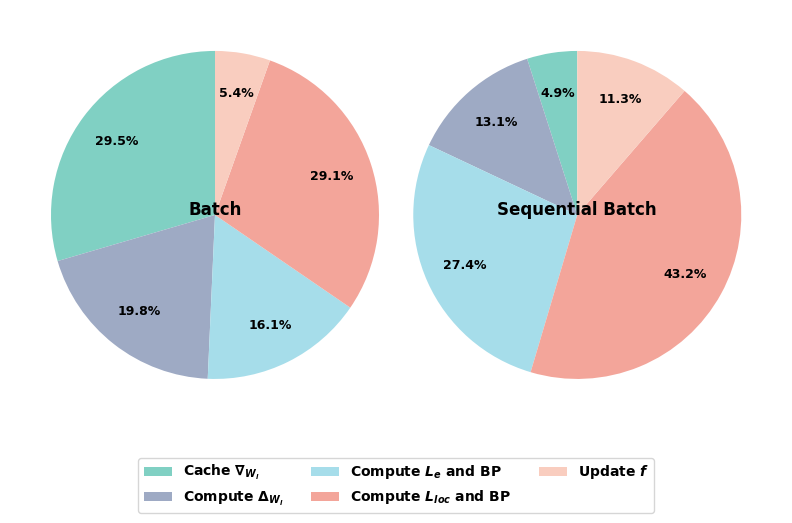

In [58]:
import matplotlib.pyplot as plt
import numpy as np

# 标签
labels = [r"Cache $\nabla_{W_l}$", r"Compute $\Delta_{W_l}$", r"Compute $L_e$ and BP", r"Compute $L_{loc}$ and BP", r"Update $f$"]

# 数据（平均值）
data_batch = np.array([
    [242.899, 173.447, 103.529, 184.891, 45.971],
    [181.684, 125.812, 108.018, 184.478, 27.250],
    [121.925, 83.823, 72.582, 139.145, 29.637],
    [106.398, 53.615, 72.724, 135.239, 17.374]
]).mean(axis=0)

data_seq = np.array([
    [198.51, 263.71, 553.67+433.42, 1089.50+436.51, 179.73],
    [180.34, 213.47, 568.18+426.32, 1064.81+425.53, 166.88],
    [98.15, 520.79, 453.62+129.82, 846.57+131.61, 485.95],
    [93.59, 507.04, 464.82+131.25, 861.49+131.11, 476.24]
]).mean(axis=0)

# 计算百分比
total_batch = data_batch.sum()
total_seq = data_seq.sum()
percent_batch = data_batch / total_batch * 100
percent_seq = data_seq / total_seq * 100

# 水平堆叠条形图
bar_height = 0.6
y = np.array([0, 1])  # 两组条的位置
colors = ["#80D0C3", "#9EAAC4", "#A6DDEA", "#F3A59A", "#F9CDBF"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plt.subplots_adjust(wspace=-0.9) 
# 左侧：Batch的饼图（只显示百分比，用连线指向外部标签）
wedges1, texts1, autotexts1 = ax1.pie(data_batch, autopct='%1.1f%%',
                                        colors=colors, startangle=90,
                                        pctdistance=0.75,
                                        textprops={'fontsize': 9, 'weight': 'bold'})

ax1.set_title(f'Batch', fontweight='bold', fontsize=12, pad=0,y=0.5)

# 右侧：Sequential Batch的饼图
wedges2, texts2, autotexts2 = ax2.pie(data_seq, autopct='%1.1f%%',
                                        colors=colors, startangle=90,
                                        pctdistance=0.75,
                                        textprops={'fontsize': 9, 'weight': 'bold'})
ax2.set_title(f'Sequential Batch', fontweight='bold', fontsize=12, pad=0,y=0.5)

# 添加共享图例在底部
fig.legend(labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), 
          ncol=3, frameon=True, fontsize=10)

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
# plt.savefig("./figs/time_consume_pie_compact3.pdf", bbox_inches='tight', dpi=300)
plt.show()


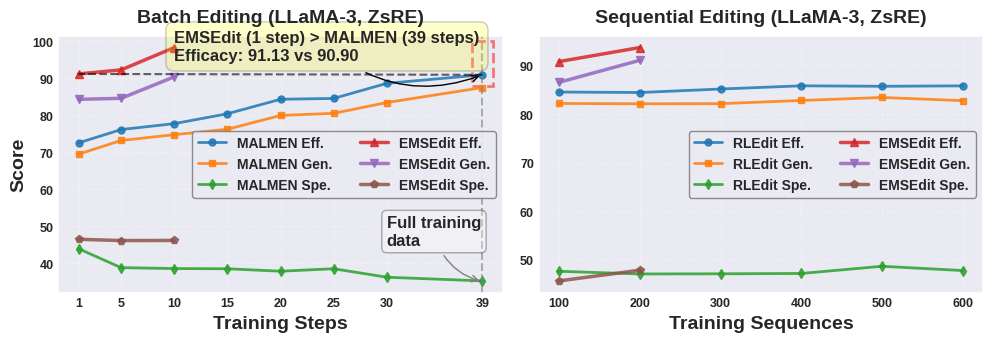

In [20]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 设置更现代的样式
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['axes.linewidth'] = 1.2

# Data for MALMEN (batch editing, varying steps)
malmen_steps = [1, 5, 10, 15, 20, 25, 30, 39]
malmen_eff = [72.52, 76.11, 77.71, 80.38, 84.29, 84.52, 88.59, 90.90]
malmen_gen = [69.47, 73.16, 74.73, 76.19, 79.93, 80.49, 83.41, 87.45]
malmen_spe = [43.92, 38.81, 38.57, 38.51, 37.85, 38.52, 36.23, 35.23]

# Data for EMSEdit (batch editing, varying steps)
EMSEdit_steps = [1, 5, 10]
EMSEdit_eff = [91.13, 92.23, 98.26]
EMSEdit_gen = [84.28, 84.55, 90.36]
EMSEdit_spe = [46.48, 46.13, 46.16]

# Data for RLEdit (sequential editing, varying training sequences)
rledit_seq = [100, 200, 300, 400, 500, 600]
rledit_eff = [84.52, 84.42, 85.14, 85.80, 85.70, 85.79]
rledit_gen = [82.17, 82.11, 82.13, 82.79, 83.40, 82.75]
rledit_spe = [47.68, 47.13, 47.16, 47.23, 48.71, 47.83]

# Data for EMSEdit (sequential editing, varying training sequences)
EMSEdit_seq = [100, 200]
EMSEdit_seq_eff = [90.78, 93.66]
EMSEdit_seq_gen = [86.51, 91.04]
EMSEdit_seq_spe = [45.70, 47.90]

# 定义配色方案 - 使用更鲜明的颜色
colors_malmen = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝、橙、绿
colors_EMSEdit = ['#d62728', '#9467bd', '#8c564b']  # 红、紫、棕
markers_malmen = ['o', 's', 'd']
markers_EMSEdit = ['^', 'v', 'p']

# 创建子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))
fig.patch.set_facecolor('white')

# --- Plot 1: Batch Editing (Steps) ---
ax1.plot(malmen_steps, malmen_eff, marker=markers_malmen[0], markersize=5, 
         linewidth=2, label="MALMEN Eff.", color=colors_malmen[0], alpha=0.85)
ax1.plot(malmen_steps, malmen_gen, marker=markers_malmen[1], markersize=5, 
         linewidth=2, label="MALMEN Gen.", color=colors_malmen[1], alpha=0.85)
ax1.plot(malmen_steps, malmen_spe, marker=markers_malmen[2], markersize=5, 
         linewidth=2, label="MALMEN Spe.", color=colors_malmen[2], alpha=0.85)
ax1.plot(EMSEdit_steps, EMSEdit_eff, marker=markers_EMSEdit[0], markersize=6, 
         linewidth=2.5, label="EMSEdit Eff.", color=colors_EMSEdit[0], alpha=0.85)
ax1.plot(EMSEdit_steps, EMSEdit_gen, marker=markers_EMSEdit[1], markersize=6, 
         linewidth=2.5, label="EMSEdit Gen.", color=colors_EMSEdit[1], alpha=0.85)
ax1.plot(EMSEdit_steps, EMSEdit_spe, marker=markers_EMSEdit[2], markersize=6, 
         linewidth=2.5, label="EMSEdit Spe.", color=colors_EMSEdit[2], alpha=0.85)

# 添加注释
x_malmen_last = malmen_steps[-1]
y_malmen_last_eff = malmen_eff[-1]
x_EMSEdit_first = EMSEdit_steps[0]
y_EMSEdit_first_eff = EMSEdit_eff[0]

# 连接线
ax1.plot([x_malmen_last, x_EMSEdit_first], [y_malmen_last_eff, y_EMSEdit_first_eff],
         "k--", linewidth=1.5, alpha=0.6)

# 注释文字 - 更简洁
ax1.annotate('EMSEdit (1 step) > MALMEN (39 steps)\nEfficacy: 91.13 vs 90.90', 
             xy=(x_malmen_last, y_malmen_last_eff),
             xytext=(10, 95), fontsize=12,
             bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow', alpha=0.2),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                           color='black', lw=1))

# 全训练数据标记
ax1.axvline(x=39, color="gray", linestyle="--", linewidth=1.5, alpha=0.6)
ax1.annotate('Full training\ndata', 
             xy=(39, 35),
             xytext=(30, 45), fontsize=12,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=0.3),
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.3', 
                           color='gray', lw=1))
# 高亮最后一个点
rect = mpatches.Rectangle((38, 88), 2, 12, linewidth=2, 
                          edgecolor='red', facecolor='none', 
                          linestyle='--', alpha=0.5)
ax1.add_patch(rect)

ax1.set_xlabel("Training Steps", fontsize=14, fontweight='bold')
ax1.set_ylabel("Score", fontsize=14, fontweight='bold')
ax1.set_title("Batch Editing (LLaMA-3, ZsRE)", fontsize=14, fontweight='bold', pad=10)
ax1.legend(frameon=True, loc='best', ncol=2, fontsize=10, 
          framealpha=0.9, edgecolor='gray')
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax1.set_xticks([1, 5, 10, 15, 20, 25, 30, 39])

# --- Plot 2: Sequential Editing (Training Sequences) ---
ax2.plot(rledit_seq, rledit_eff, marker='o', markersize=5, linewidth=2, 
         label="RLEdit Eff.", color=colors_malmen[0], alpha=0.85)
ax2.plot(rledit_seq, rledit_gen, marker='s', markersize=5, linewidth=2, 
         label="RLEdit Gen.", color=colors_malmen[1], alpha=0.85)
ax2.plot(rledit_seq, rledit_spe, marker='d', markersize=5, linewidth=2, 
         label="RLEdit Spe.", color=colors_malmen[2], alpha=0.85)
ax2.plot(EMSEdit_seq, EMSEdit_seq_eff, marker='^', markersize=6, linewidth=2.5, 
         label="EMSEdit Eff.", color=colors_EMSEdit[0], alpha=0.85)
ax2.plot(EMSEdit_seq, EMSEdit_seq_gen, marker='v', markersize=6, linewidth=2.5, 
         label="EMSEdit Gen.", color=colors_EMSEdit[1], alpha=0.85)
ax2.plot(EMSEdit_seq, EMSEdit_seq_spe, marker='p', markersize=6, linewidth=2.5, 
         label="EMSEdit Spe.", color=colors_EMSEdit[2], alpha=0.85)

ax2.set_xlabel("Training Sequences", fontsize=14, fontweight='bold')
# ax2.set_ylabel("Score", fontsize=14, fontweight='bold')
ax2.set_title("Sequential Editing (LLaMA-3, ZsRE)", fontsize=14, fontweight='bold', pad=10)
ax2.legend(frameon=True, loc='best', ncol=2, fontsize=10, 
          framealpha=0.9, edgecolor='gray')
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
plt.subplots_adjust(wspace=-0.1) 
plt.tight_layout()
plt.savefig("./figs/data_efficiency_comparison.pdf", bbox_inches='tight', dpi=300)
plt.show()

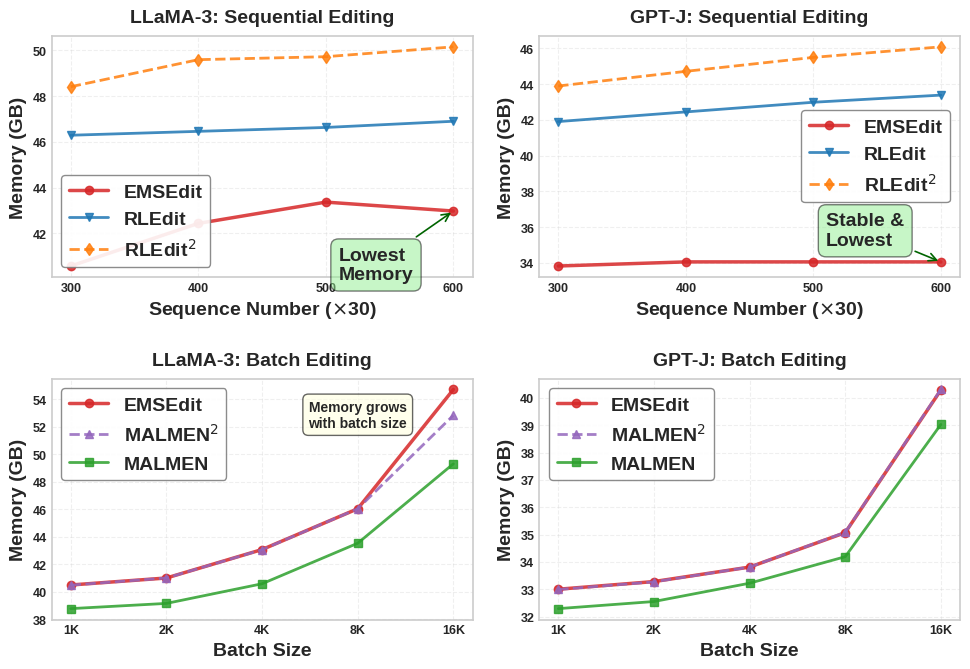

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# 设置更现代的样式
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 9
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 8
plt.rcParams['axes.linewidth'] = 1.2

# ----------------- SEQ 数据 -----------------
seq_data = {
    'Llama3': {
        'EMSEdit': [40.58, 42.44, 43.37, 42.98],
        'RLEdit': [46.29, 46.46, 46.63, 46.90],
        r'RLEdit$^2$': [48.41, 49.59, 49.72, 50.15],
        'x': [300, 400, 500, 600]
    },
    'GPTJ': {
        'EMSEdit': [33.83, 34.06, 34.06, 34.06],
        'RLEdit': [41.91, 42.45, 42.99, 43.39],
        r'RLEdit$^2$': [43.90, 44.72, 45.50, 46.09],
        'x': [300, 400, 500, 600]
    }
}

# ----------------- BATCH 数据 -----------------
batch_data = {
    'Llama3': {
        'EMSEdit': [40.49, 41.00, 43.07, 46.04, 54.72],
        r'MALMEN$^2$': [40.48, 41.00, 43.06, 46.04, 52.84],
        'MALMEN': [38.77, 39.15, 40.58, 43.53, 49.31],
        'x': [1024, 2048, 4096, 8192, 16384]
    },
    'GPTJ': {
        'EMSEdit': [33.00, 33.28, 33.81, 35.07, 40.29],
        r'MALMEN$^2$': [32.99, 33.27, 33.81, 35.08, 40.31],
        'MALMEN': [32.29, 32.55, 33.22, 34.19, 39.03],
        'x': [1024, 2048, 4096, 8192, 16384]
    }
}

# 定义专业配色方案
color_map = {
    'EMSEdit': '#d62728',      # 红色 - 最优方法
    'RLEdit': '#1f77b4',      # 蓝色
    r'RLEdit$^2$': '#ff7f0e', # 橙色 - 改进版本
    r'MALMEN$^2$': '#9467bd', # 紫色 - 改进版本
    'MALMEN': '#2ca02c'       # 绿色
}

marker_map = {
    'EMSEdit': 'o',
    'RLEdit': 'v',
    r'RLEdit$^2$': 'd',
    r'MALMEN$^2$': '^',
    'MALMEN': 's'
}

# 创建一个 2x2 的子图网格，调整尺寸更紧凑
fig, axs = plt.subplots(2, 2, figsize=(10, 7))
fig.patch.set_facecolor('white')

# 绘制 Llama3 - SEQ
ax1 = axs[0, 0]
for method in ['EMSEdit', 'RLEdit', r'RLEdit$^2$']:
    linestyle = '--' if method == r'RLEdit$^2$' else '-'
    linewidth = 2.5 if method == 'EMSEdit' else 2
    ax1.plot(seq_data['Llama3']['x'], seq_data['Llama3'][method], 
             marker=marker_map[method], label=method, linestyle=linestyle,
             color=color_map[method], linewidth=linewidth, markersize=6, alpha=0.85)

ax1.set_xlabel(r'Sequence Number ($\times$30)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Memory (GB)', fontsize=14, fontweight='bold')
ax1.set_title('LLaMA-3: Sequential Editing', fontsize=14, fontweight='bold', pad=10)
ax1.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax1.legend(loc='best', frameon=True, framealpha=0.9, edgecolor='gray',fontsize=14)
ax1.set_xticks(seq_data['Llama3']['x'])

# 绘制 GPTJ - SEQ
ax2 = axs[0, 1]
for method in ['EMSEdit', 'RLEdit', r'RLEdit$^2$']:
    linestyle = '--' if method == r'RLEdit$^2$' else '-'
    linewidth = 2.5 if method == 'EMSEdit' else 2
    ax2.plot(seq_data['GPTJ']['x'], seq_data['GPTJ'][method], 
             marker=marker_map[method], label=method, linestyle=linestyle,
             color=color_map[method], linewidth=linewidth, markersize=6, alpha=0.85)

ax2.set_xlabel(r'Sequence Number ($\times$30)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Memory (GB)', fontsize=14, fontweight='bold')
ax2.set_title('GPT-J: Sequential Editing', fontsize=14, fontweight='bold', pad=10)
ax2.grid(True, alpha=0.3, linestyle='--', linewidth=0.8)
ax2.legend(loc='best', frameon=True, framealpha=0.9, edgecolor='gray',fontsize=14)
ax2.set_xticks(seq_data['GPTJ']['x'])

# 绘制 Llama3 - BATCH
ax3 = axs[1, 0]
for method in ['EMSEdit', r'MALMEN$^2$', 'MALMEN']:
    linestyle = '--' if method == r'MALMEN$^2$' else '-'
    linewidth = 2.5 if method == 'EMSEdit' else 2
    ax3.plot(batch_data['Llama3']['x'], batch_data['Llama3'][method], 
             marker=marker_map[method], label=method, linestyle=linestyle,
             color=color_map[method], linewidth=linewidth, markersize=6, alpha=0.85)

ax3.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
ax3.set_ylabel('Memory (GB)', fontsize=14, fontweight='bold')
ax3.set_title('LLaMA-3: Batch Editing', fontsize=14, fontweight='bold', pad=10)
ax3.set_xscale('log', base=2)
ax3.grid(True, which='both', linestyle='--', alpha=0.3, linewidth=0.8)
ax3.legend(loc='upper left', frameon=True, framealpha=0.9, edgecolor='gray',fontsize=14)

# 优化 x 轴刻度标签
ax3.set_xticks(batch_data['Llama3']['x'])
ax3.set_xticklabels(['1K', '2K', '4K', '8K', '16K'])

# 绘制 GPTJ - BATCH
ax4 = axs[1, 1]
for method in ['EMSEdit', r'MALMEN$^2$', 'MALMEN']:
    linestyle = '--' if method == r'MALMEN$^2$' else '-'
    linewidth = 2.5 if method == 'EMSEdit' else 2
    ax4.plot(batch_data['GPTJ']['x'], batch_data['GPTJ'][method], 
             marker=marker_map[method], label=method, linestyle=linestyle,
             color=color_map[method], linewidth=linewidth, markersize=6, alpha=0.85)

ax4.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
ax4.set_ylabel('Memory (GB)', fontsize=14, fontweight='bold')
ax4.set_title('GPT-J: Batch Editing', fontsize=14, fontweight='bold', pad=10)
ax4.set_xscale('log', base=2)
ax4.grid(True, which='both', linestyle='--', alpha=0.3, linewidth=0.8)
ax4.legend(loc='upper left', frameon=True, framealpha=0.9, edgecolor='gray', fontsize=14)

# 优化 x 轴刻度标签
ax4.set_xticks(batch_data['GPTJ']['x'])
ax4.set_xticklabels(['1K', '2K', '4K', '8K', '16K'])

ax1.annotate('Lowest\nMemory', 
             xy=(600, seq_data['Llama3']['EMSEdit'][-1]),
             xytext=(510, 40), fontsize=14,
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.5),
             arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.2))

# GPTJ-SEQ: EMSEdit 内存最低且稳定
ax2.annotate('Stable &\nLowest', 
             xy=(600, seq_data['GPTJ']['EMSEdit'][-1]),
             xytext=(510, 35), fontsize=14,
             bbox=dict(boxstyle='round,pad=0.4', facecolor='lightgreen', alpha=0.5),
             arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.2))
# Llama3-BATCH: 标注内存增长
ax3.text(8192, 52, 'Memory grows\nwith batch size', 
         fontsize=10, ha='center',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', alpha=0.6))

# 调整子图布局，避免重叠
plt.tight_layout(pad=2.0, h_pad=2.5, w_pad=2.0)

# 保存高分辨率图像
plt.savefig("./figs/memory_efficiency.pdf", bbox_inches='tight', dpi=300)
plt.show()

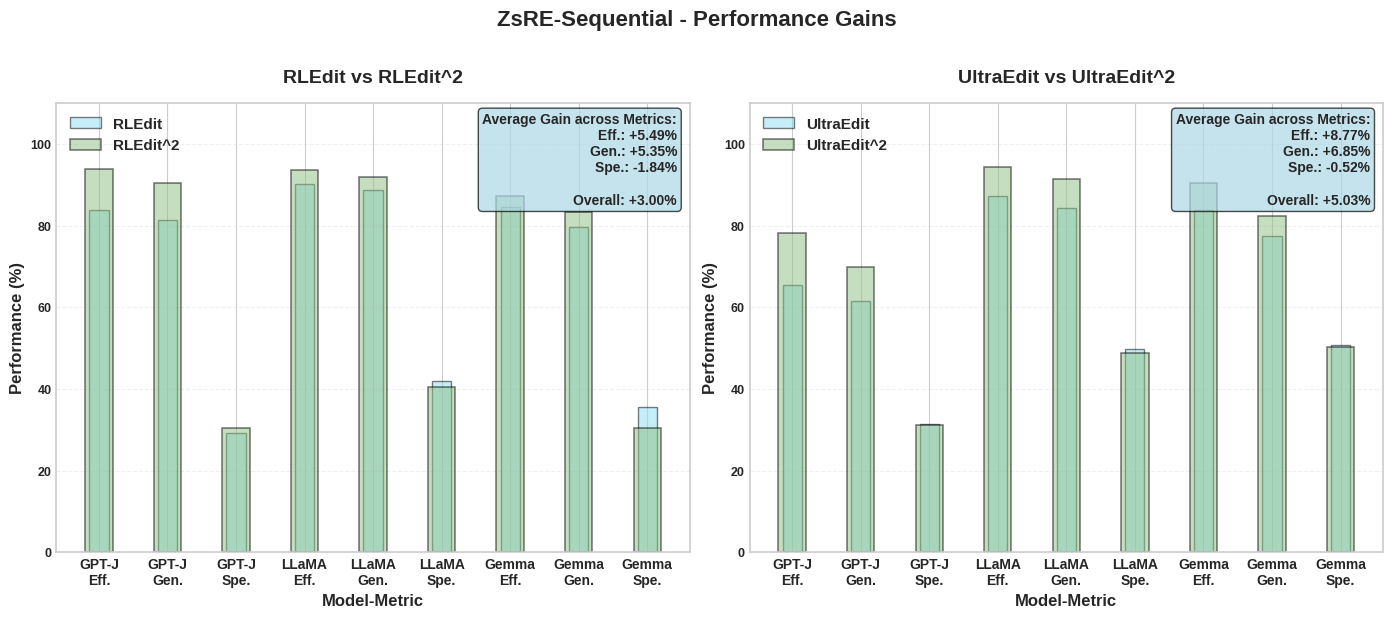

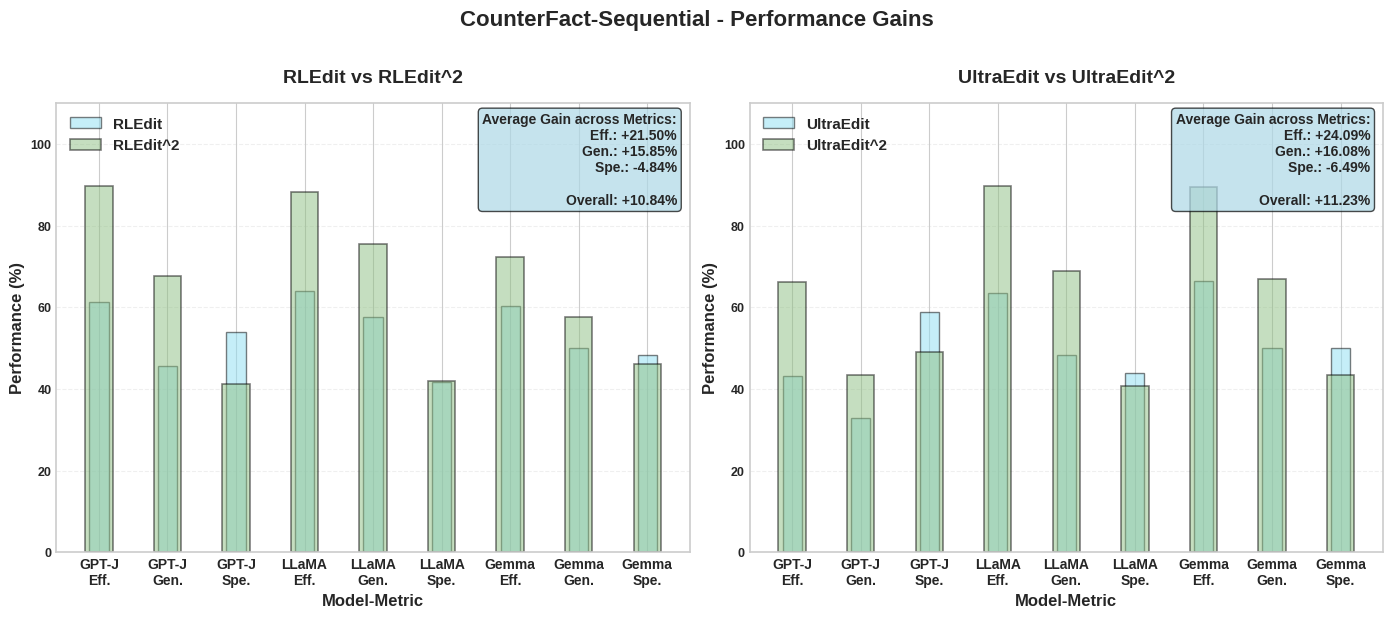

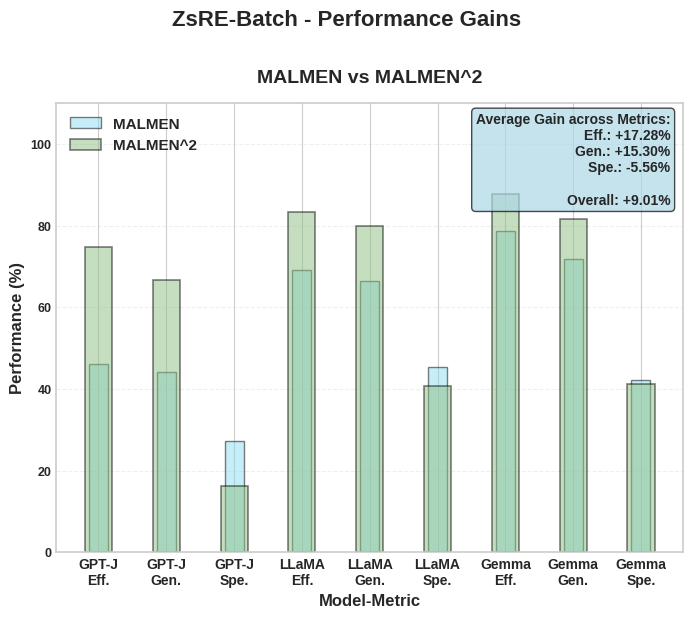

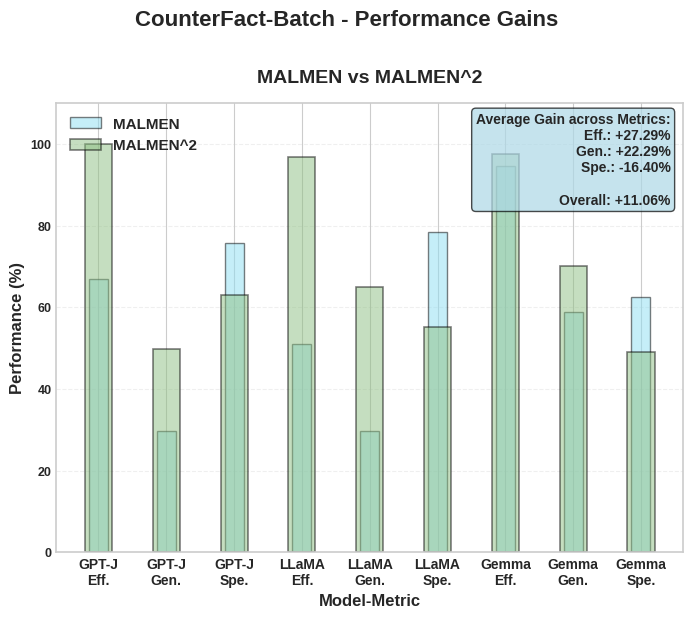


详细增益统计表

ZsRE-Sequential

RLEdit vs RLEdit^2:
----------------------------------------------------------------------------------------------------
模型         |       M1增益 |       M2增益 |       M3增益 |       平均增益
----------------------------------------------------------------------------------------------------
GPT-J      |    +10.12% |     +9.07% |     +1.27% |     +6.82%
LLaMA      |     +3.61% |     +3.25% |     -1.63% |     +1.74%
Gemma      |     +2.74% |     +3.74% |     -5.17% |     +0.44%
----------------------------------------------------------------------------------------------------
指标平均       |     +5.49% |     +5.35% |     -1.84% |     +3.00%

UltraEdit vs UltraEdit^2:
----------------------------------------------------------------------------------------------------
模型         |       M1增益 |       M2增益 |       M3增益 |       平均增益
----------------------------------------------------------------------------------------------------
GPT-J      |    +12.79% |     +8.44% |     

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
datasets = {
    "ZsRE-Sequential": {
        "RLEdit": {
            "GPT-J":  [83.76, 81.47, 29.13],
            "LLaMA":  [90.16, 88.78, 42.04],
            "Gemma":  [84.60, 79.66, 35.67],
        },
        "RLEdit^2": {
            "GPT-J":  [93.88, 90.54, 30.40],
            "LLaMA":  [93.77, 92.03, 40.41],
            "Gemma":  [87.34, 83.40, 30.50],
        },
        "UltraEdit": {
            "GPT-J":  [65.53, 61.59, 31.34],
            "LLaMA":  [87.41, 84.29, 49.94],
            "Gemma":  [83.76, 77.47, 50.73],
        },
        "UltraEdit^2": {
            "GPT-J":  [78.32, 70.03, 31.24],
            "LLaMA":  [94.30, 91.50, 48.89],
            "Gemma":  [90.38, 82.37, 50.31],
        },
    },
    "CounterFact-Sequential": {
        "RLEdit": {
            "GPT-J":  [61.34, 45.76, 54.06],
            "LLaMA":  [63.95, 57.56, 41.72],
            "Gemma":  [60.31, 50.16, 48.34],
        },
        "RLEdit^2": {
            "GPT-J":  [89.63, 67.77, 41.35],
            "LLaMA":  [88.19, 75.63, 42.06],
            "Gemma":  [72.28, 57.62, 46.19],
        },
        "UltraEdit": {
            "GPT-J":  [43.23, 32.81, 58.85],
            "LLaMA":  [63.55, 48.37, 43.87],
            "Gemma":  [66.43, 49.97, 49.97],
        },
        "UltraEdit^2": {
            "GPT-J":  [66.30, 43.53, 49.16],
            "LLaMA":  [89.78, 68.83, 40.66],
            "Gemma":  [89.40, 67.04, 43.40],
        },
    },
    "ZsRE-Batch": {
        "MALMEN": {
            "GPT-J":  [46.05, 44.14, 27.29],
            "LLaMA":  [69.28, 66.59, 45.46],
            "Gemma":  [78.76, 71.85, 42.18],
        },
        "MALMEN^2": {
            "GPT-J":  [74.76, 66.81, 16.34],
            "LLaMA":  [83.40, 80.03, 40.74],
            "Gemma":  [87.78, 81.65, 41.18],
        },
    },
    "CounterFact-Batch": {
        "MALMEN": {
            "GPT-J":  [66.92, 29.64, 75.86],
            "LLaMA":  [51.06, 29.63, 78.42],
            "Gemma":  [94.57, 58.86, 62.46],
        },
        "MALMEN^2": {
            "GPT-J":  [99.96, 49.77, 63.07],
            "LLaMA":  [96.97, 65.02, 55.26],
            "Gemma":  [97.49, 70.21, 49.20],
        },
    },
}

# 定义颜色
colors = {
    'GPT-J': {'base': "#8ddef2", 'enhanced': "#8dbf82"},
    'LLaMA': {'base': "#8ddef2", 'enhanced': "#8dbf82"},
    'Gemma': {'base': "#8ddef2", 'enhanced': "#8dbf82"},
}

models = ['GPT-J', 'LLaMA', 'Gemma']
metrics = ['Eff.', 'Gen.', 'Spe.']

def plot_dataset(dataset_name, data):
    """为单个数据集绘制增益对比图"""
    methods = [m for m in data.keys() if '^2' not in m]
    
    n_methods = len(methods)
    fig, axes = plt.subplots(1, n_methods, figsize=(7 * n_methods, 6))
    
    if n_methods == 1:
        axes = [axes]
    
    fig.suptitle(f'{dataset_name} - Performance Gains', fontsize=16, fontweight='bold', y=1.02)
    
    for idx, method in enumerate(methods):
        ax = axes[idx]
        method2 = method + '^2'
        
        # 准备数据
        n_groups = len(models) * len(metrics)
        x = np.arange(n_groups)
        width = 0.4
        
        base_values = []
        enhanced_values = []
        labels = []
        bar_colors_base = []
        bar_colors_enhanced = []
        
        for model in models:
            for i, metric in enumerate(metrics):
                base_val = data[method][model][i]
                enhanced_val = data[method2][model][i]
                
                base_values.append(base_val)
                enhanced_values.append(enhanced_val)
                labels.append(f'{model}\n{metric}')
                bar_colors_base.append(colors[model]['base'])
                bar_colors_enhanced.append(colors[model]['enhanced'])
        
        # 绘制重叠柱状图 - 完全重叠在同一位置
        width_base = width * 0.7
        width_enhanced = width * 1.0
        
        bars1 = ax.bar(x, base_values, width_base, 
                       label=method, color=bar_colors_base, 
                       alpha=0.5, edgecolor='black', linewidth=1)
        bars2 = ax.bar(x, enhanced_values, width_enhanced,
                       label=method2, color=bar_colors_enhanced,
                       alpha=0.5, edgecolor='black', linewidth=1.2)
        
        # 设置标签和标题
        ax.set_xlabel('Model-Metric', fontsize=12, fontweight='bold')
        ax.set_ylabel('Performance (%)', fontsize=12, fontweight='bold')
        ax.set_title(f'{method} vs {method2}', fontsize=14, fontweight='bold', pad=15)
        ax.set_xticks(x)
        ax.set_xticklabels(labels, fontsize=10, rotation=0, ha='center')
        ax.set_ylim(0, 110)
        ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
        ax.grid(axis='y', alpha=0.3, linestyle='--')
        
        # 计算每个指标的平均增益
        metric_gains = {metric: [] for metric in metrics}
        for i, label in enumerate(labels):
            metric = label.split('\n')[1]
            gain = enhanced_values[i] - base_values[i]
            metric_gains[metric].append(gain)
        
        # 显示指标平均增益
        metric_avg_text = "Average Gain across Metrics:\n"
        for metric in metrics:
            avg_gain = np.mean(metric_gains[metric])
            metric_avg_text += f"{metric}: {avg_gain:+.2f}%\n"
        
        # 总体平均增益
        all_gains = [enhanced_values[i] - base_values[i] for i in range(len(base_values))]
        overall_avg = np.mean(all_gains)
        metric_avg_text += f"\nOverall: {overall_avg:+.2f}%"
        
        ax.text(0.98, 0.98, metric_avg_text,
               transform=ax.transAxes, fontsize=10,
               verticalalignment='top', horizontalalignment='right',
               bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))
    
    plt.tight_layout()
    return fig

# 为每个数据集生成图表
for dataset_name, data in datasets.items():
    fig = plot_dataset(dataset_name, data)
    plt.savefig(f'./figs/{dataset_name.replace("-", "_")}_gain_comparison.pdf', 
                dpi=300, bbox_inches='tight')

plt.show()

# 生成详细的增益统计表
print("\n" + "="*100)
print("详细增益统计表")
print("="*100)

for dataset_name, data in datasets.items():
    print(f"\n{'='*100}")
    print(f"{dataset_name}")
    print(f"{'='*100}")
    
    methods = [m for m in data.keys() if '^2' not in m]
    
    for method in methods:
        method2 = method + '^2'
        print(f"\n{method} vs {method2}:")
        print("-" * 100)
        
        # 表头
        print(f"{'模型':<10} | {'M1增益':>10} | {'M2增益':>10} | {'M3增益':>10} | {'平均增益':>10}")
        print("-" * 100)
        
        # 收集每个指标的增益用于计算平均
        m1_gains, m2_gains, m3_gains = [], [], []
        
        for model in models:
            base_vals = np.array(data[method][model])
            enhanced_vals = np.array(data[method2][model])
            gains = enhanced_vals - base_vals
            avg_gain = np.mean(gains)
            
            m1_gains.append(gains[0])
            m2_gains.append(gains[1])
            m3_gains.append(gains[2])
            
            print(f"{model:<10} | {gains[0]:>+9.2f}% | {gains[1]:>+9.2f}% | {gains[2]:>+9.2f}% | {avg_gain:>+9.2f}%")
        
        print("-" * 100)
        # 各指标的平均增益
        print(f"{'指标平均':<10} | {np.mean(m1_gains):>+9.2f}% | {np.mean(m2_gains):>+9.2f}% | {np.mean(m3_gains):>+9.2f}% | {np.mean([np.mean(m1_gains), np.mean(m2_gains), np.mean(m3_gains)]):>+9.2f}%")
        print("=" * 100)

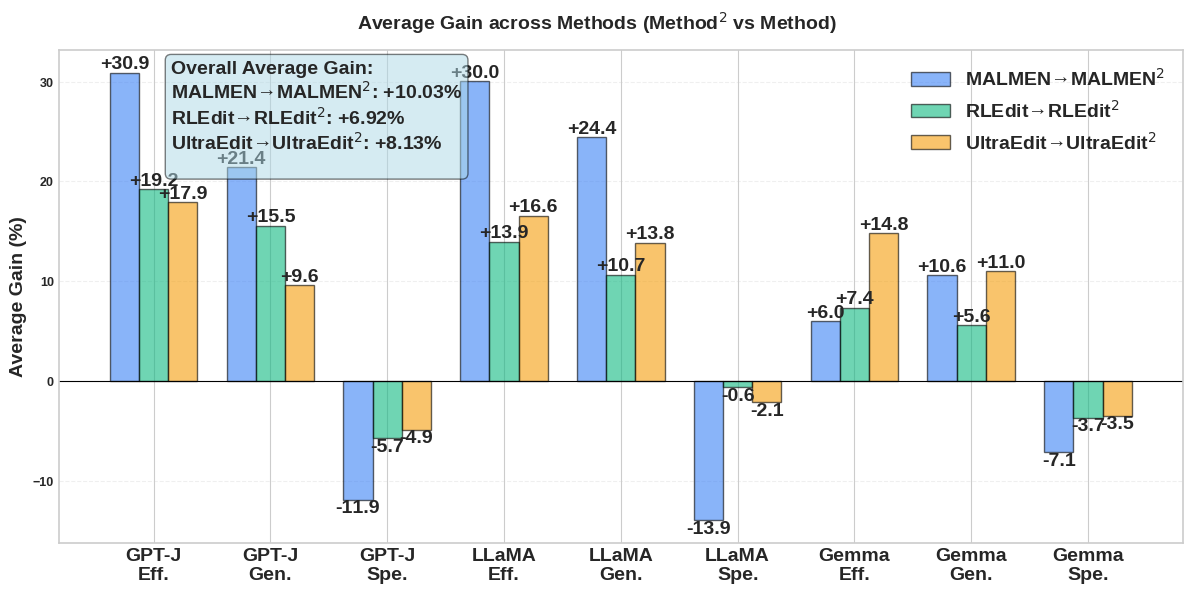

In [24]:
# 计算所有实验的平均增益
def calculate_average_gains():
    """计算所有数据集上每个方法对的平均增益"""
    method_gains = {}
    
    # 收集所有方法名
    all_methods = set()
    for dataset_data in datasets.values():
        for method in dataset_data.keys():
            if '^2' not in method:
                all_methods.add(method)
    
    # 对每个方法计算平均增益
    for method in all_methods:
        method2 = method + '^2'
        
        # 收集所有数据集中该方法的增益
        all_gains = {model: {metric: [] for metric in metrics} for model in models}
        
        for dataset_name, dataset_data in datasets.items():
            if method in dataset_data and method2 in dataset_data:
                for model in models:
                    base_vals = np.array(dataset_data[method][model])
                    enhanced_vals = np.array(dataset_data[method2][model])
                    gains = enhanced_vals - base_vals
                    
                    for i, metric in enumerate(metrics):
                        all_gains[model][metric].append(gains[i])
        
        # 计算平均
        avg_gains = {model: [] for model in models}
        for model in models:
            for metric in metrics:
                if all_gains[model][metric]:  # 如果有数据
                    avg_gains[model].append(np.mean(all_gains[model][metric]))
                else:
                    avg_gains[model].append(0)
        
        method_gains[method] = avg_gains
    
    return method_gains

# 计算平均增益
method_gains = calculate_average_gains()

# 绘制平均增益图
def plot_average_gains(method_gains):
    """绘制所有方法的平均增益对比图"""
    methods = sorted(method_gains.keys())
    n_methods = len(methods)
    
    fig, ax = plt.subplots(1, 1, figsize=(12, 6))
    
    fig.suptitle(r'Average Gain across Methods (Method$^2$ vs Method)', fontsize=14, fontweight='bold', y=0.98)
    
    # 准备数据
    n_groups = len(models) * len(metrics)
    x = np.arange(n_groups)
    width = 0.25  # 每个方法的柱宽
    
    bar_positions = []
    bar_labels = []
    
    # 为每个方法准备位置
    offset = -(n_methods - 1) * width / 2
    for i, method in enumerate(methods):
        bar_positions.append(x + offset + i * width)
        bar_labels.append(method)
    
    # 准备x轴标签
    labels = []
    for model in models:
        for metric in metrics:
            labels.append(f'{model}\n{metric}')
    
    # 为每个方法绘制柱状图
    method_colors = ['#3b82f6', '#10b981', '#f59e0b']
    
    for i, method in enumerate(methods):
        gains = []
        bar_colors = []
        
        for model in models:
            for j, metric in enumerate(metrics):
                gains.append(method_gains[method][model][j])
                bar_colors.append(method_colors[i])
        
        bars = ax.bar(bar_positions[i], gains, width, 
                     label=f'{method}→{method}$^2$', 
                     color=method_colors[i], 
                     alpha=0.6, 
                     edgecolor='black', 
                     linewidth=1)
        
        # 在柱子上方添加数值标签
        for j, (bar, gain) in enumerate(zip(bars, gains)):
            if abs(gain) > 0.5:  # 只显示明显的增益
                height = bar.get_height()
                ax.text(bar.get_x() + bar.get_width()/2., height,
                       f'{gain:+.1f}',
                       ha='center', va='bottom' if gain > 0 else 'top',
                       fontsize=14, fontweight='bold')
    
    # 设置图表属性
    # ax.set_xlabel('Model-Metric', fontsize=12, fontweight='bold')
    ax.set_ylabel('Average Gain (%)', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(labels, fontsize=14, rotation=0, ha='center')
    ax.legend(loc='best', fontsize=14, framealpha=0.9)
    ax.grid(axis='y', alpha=0.3, linestyle='--')
    ax.axhline(y=0, color='black', linestyle='-', linewidth=0.8)
    
    # 添加统计信息
    stats_text = "Overall Average Gain:\n"
    for method in methods:
        all_gains = []
        for model in models:
            all_gains.extend(method_gains[method][model])
        avg = np.mean(all_gains)
        stats_text += f"{method}→{method}$^2$: {avg:+.2f}%\n"
    
    ax.text(0.1, 0.98, stats_text,
           transform=ax.transAxes, fontsize=14,
           verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.5))
    
    plt.tight_layout()
    return fig

# 生成平均增益图
fig = plot_average_gains(method_gains)
plt.savefig('./figs/average_gains_comparison.pdf', dpi=300, bbox_inches='tight')

plt.show()

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times Ne

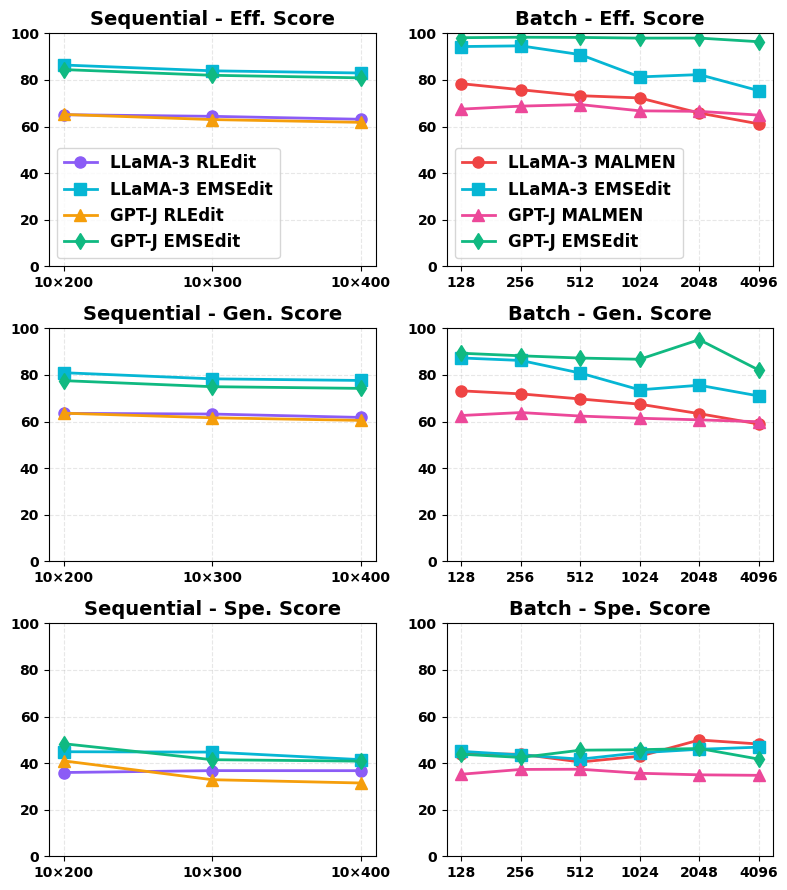

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# 设置中文字体（如果需要显示中文）
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['axes.unicode_minus'] = False

# Sequential数据
sequential_data = {
    'LLaMA-3 RLEdit': {
        'settings': ['10×200', '10×300', '10×400'],
        'Eff': [65.07, 64.37, 63.11],
        'Gen': [63.51, 63.21, 61.75],
        'Spe': [35.96, 36.77, 36.75]
    },
    'LLaMA-3 EMSEdit': {
        'settings': ['10×200', '10×300', '10×400'],
        'Eff': [86.40, 83.91, 82.97],
        'Gen': [80.95, 78.32, 77.63],
        'Spe': [44.88, 44.72, 41.49]
    },
    'GPT-J RLEdit': {
        'settings': ['10×200', '10×300', '10×400'],
        'Eff': [65.18, 62.98, 61.79],
        'Gen': [63.57, 61.60, 60.48],
        'Spe': [40.96, 32.87, 31.46]
    },
    'GPT-J EMSEdit': {
        'settings': ['10×200', '10×300', '10×400'],
        'Eff': [84.44, 81.99, 80.89],
        'Gen': [77.55, 74.95, 74.22],
        'Spe': [48.33, 41.46, 40.83]
    }
}

# Batch数据
batch_data = {
    'LLaMA-3 MALMEN': {
        'settings': [128, 256, 512, 1024, 2048, 4096],
        'Eff': [78.39, 75.78, 73.22, 72.27, 65.79, 61.14],
        'Gen': [73.16, 71.86, 69.68, 67.44, 63.38, 58.94],
        'Spe': [44.01, 43.82, 40.48, 42.95, 49.92, 48.20]
    },
    'LLaMA-3 EMSEdit': {
        'settings': [128, 256, 512, 1024, 2048, 4096],
        'Eff': [94.32, 94.63, 90.86, 81.29, 82.29, 75.41],
        'Gen': [87.28, 86.21, 80.80, 73.60, 75.57, 70.98],
        'Spe': [45.04, 43.49, 41.69, 44.45, 45.93, 46.84]
    },
    'GPT-J MALMEN': {
        'settings': [128, 256, 512, 1024, 2048, 4096],
        'Eff': [67.47, 68.75, 69.42, 66.73, 66.51, 64.90],
        'Gen': [62.58, 63.85, 62.34, 61.40, 60.72, 59.91],
        'Spe': [35.22, 37.28, 37.37, 35.64, 34.97, 34.75]
    },
    'GPT-J EMSEdit': {
        'settings': [128, 256, 512, 1024, 2048, 4096],
        'Eff': [98.13, 98.32, 98.24, 97.95, 97.97, 96.40],
        'Gen': [89.31, 88.21, 87.24, 86.72, 95.14, 82.12],
        'Spe': [43.81, 42.42, 45.54, 45.76, 46.27, 41.73]
    }
}

# 颜色配置
colors = {
    'LLaMA-3 RLEdit': '#8b5cf6',
    'LLaMA-3 EMSEdit': '#06b6d4',
    'GPT-J RLEdit': '#f59e0b',
    'GPT-J EMSEdit': '#10b981',
    'LLaMA-3 MALMEN': '#ef4444',
    'GPT-J MALMEN': '#ec4899'
}

# 标记样式
markers = {
    'LLaMA-3 RLEdit': 'o',
    'LLaMA-3 EMSEdit': 's',
    'GPT-J RLEdit': '^',
    'GPT-J EMSEdit': 'd',
    'LLaMA-3 MALMEN': 'o',
    'GPT-J MALMEN': '^'
}

# 创建图表
fig = plt.figure(figsize=(8, 9))

# Sequential部分
for i, metric in enumerate(['Eff', 'Gen', 'Spe'], 1):
    ax = plt.subplot(3, 2, i*2-1)
    for method, data in sequential_data.items():
        x = np.arange(len(data['settings']))
        ax.plot(x, data[metric], marker=markers[method], 
                color=colors[method], linewidth=2, markersize=8,
                label=method)
    # ax.set_xlabel('Setting', fontsize=14, fontweight='bold')
    # ax.set_ylabel(f'{metric}. Score', fontsize=14, fontweight='bold')
    ax.set_title(f'Sequential - {metric}. Score', fontsize=14, fontweight='bold')
    ax.set_xticks(x)
    ax.set_xticklabels(sequential_data['LLaMA-3 RLEdit']['settings'])
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_ylim(0, 100)
    if i == 1:
        ax.legend(loc='best', fontsize=12)

# Batch部分
for i, metric in enumerate(['Eff', 'Gen', 'Spe'], 1):
    ax = plt.subplot(3, 2, i*2)
    for method, data in batch_data.items():
        ax.plot(data['settings'], data[metric], marker=markers[method],
                color=colors[method], linewidth=2, markersize=8,
                label=method)
    # ax.set_xlabel('Batch Size', fontsize=14, fontweight='bold')
    # ax.set_ylabel(f'{metric}. Score', fontsize=14, fontweight='bold')
    ax.set_title(f'Batch - {metric}. Score', fontsize=14, fontweight='bold')
    ax.set_xscale('log', base=2)
    ax.set_xticks(batch_data['LLaMA-3 MALMEN']['settings'])
    ax.set_xticklabels([str(x) for x in batch_data['LLaMA-3 MALMEN']['settings']])
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_ylim(0, 100)
    if i == 1:
        ax.legend(loc='best', fontsize=12)

# plt.suptitle('Model Editing Performance Comparison', 
            #  fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()

# 保存图表
plt.savefig('./figs/ripple_res.pdf', dpi=300, bbox_inches='tight')
# print("图表已保存为 model_comparison.png")

# 显示图表
plt.show()


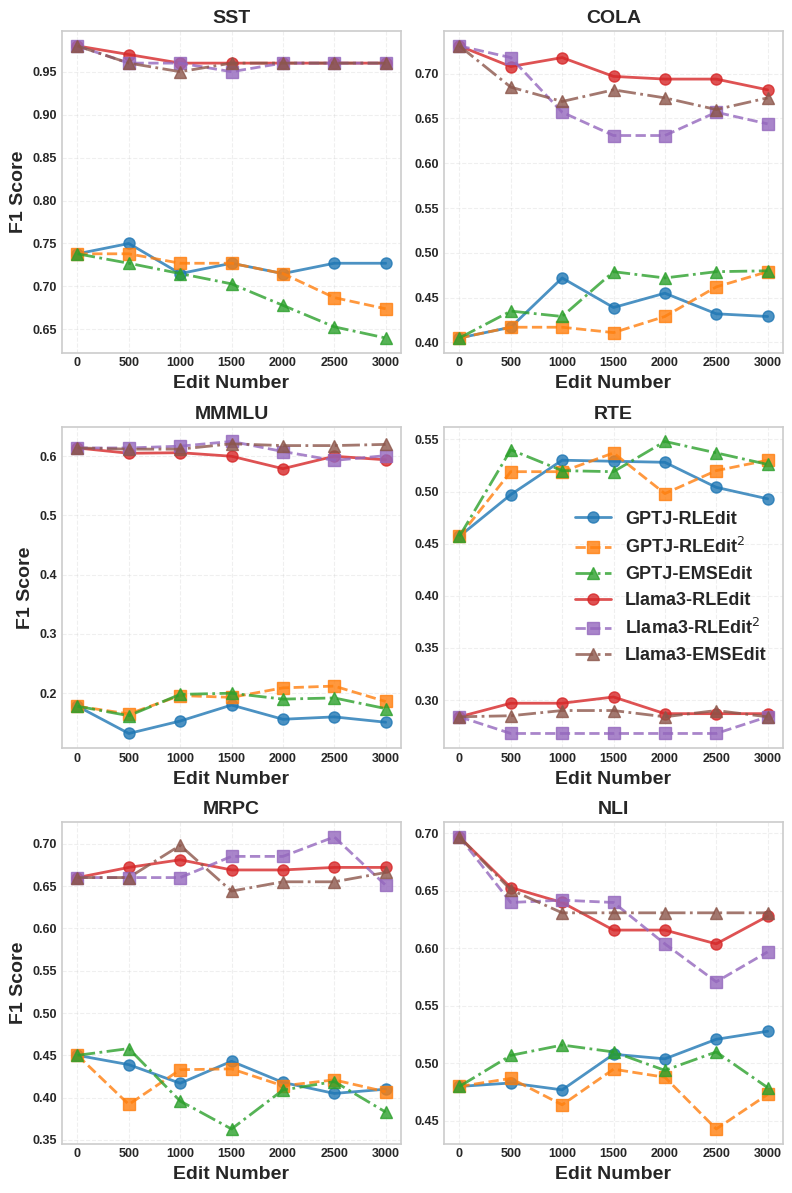

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# 数据定义
steps = [0, 500, 1000, 1500, 2000, 2500, 3000]

# GPTJ 数据
gptj_data = {
    'SST': {
        'RLEdit': [0.738, 0.75, 0.715, 0.727, 0.715, 0.727, 0.727],
        r'RLEdit$^2$': [0.738, 0.738, 0.727, 0.727, 0.715, 0.687, 0.674],
        'EMSEdit': [0.738, 0.727, 0.715, 0.703, 0.678, 0.653, 0.64]
    },
    'MMMLU': {
        'RLEdit': [0.178, 0.132, 0.153, 0.18, 0.156, 0.16, 0.151],
        r'RLEdit$^2$': [0.178, 0.165, 0.196, 0.193, 0.209, 0.212, 0.186],
        'EMSEdit': [0.178, 0.162, 0.198, 0.2, 0.19, 0.192, 0.174]
    },
    'MRPC': {
        'RLEdit': [0.45, 0.439, 0.417, 0.443, 0.418, 0.405, 0.41],
        r'RLEdit$^2$': [0.45, 0.392, 0.433, 0.434, 0.414, 0.421, 0.407],
        'EMSEdit': [0.45, 0.458, 0.396, 0.363, 0.409, 0.419, 0.383]
    },
    'COLA': {
        'RLEdit': [0.405, 0.417, 0.472, 0.439, 0.455, 0.432, 0.429],
        r'RLEdit$^2$': [0.405, 0.417, 0.417, 0.411, 0.429, 0.462, 0.479],
        'EMSEdit': [0.405, 0.435, 0.429, 0.479, 0.472, 0.479, 0.48]
    },
    'RTE': {
        'RLEdit': [0.457, 0.497, 0.53, 0.529, 0.528, 0.504, 0.493],
        r'RLEdit$^2$': [0.457, 0.519, 0.519, 0.537, 0.498, 0.52, 0.53],
        'EMSEdit': [0.457, 0.54, 0.52, 0.519, 0.548, 0.537, 0.526]
    },
    'NLI': {
        'RLEdit': [0.48, 0.483, 0.477, 0.508, 0.504, 0.521, 0.528],
        r'RLEdit$^2$': [0.48, 0.487, 0.464, 0.495, 0.488, 0.443, 0.473],
        'EMSEdit': [0.48, 0.507, 0.516, 0.51, 0.494, 0.51, 0.479]
    }
}

# Llama3 数据
llama3_data = {
    'SST': {
        'RLEdit': [0.98, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96],
        r'RLEdit$^2$': [0.98, 0.96, 0.96, 0.95, 0.96, 0.96, 0.96],
        'EMSEdit': [0.98, 0.96, 0.95, 0.96, 0.96, 0.96, 0.96]
    },
    'MMMLU': {
        'RLEdit': [0.614, 0.605, 0.606, 0.6, 0.579, 0.6, 0.594],
        r'RLEdit$^2$': [0.614, 0.614, 0.617, 0.625, 0.608, 0.593, 0.601],
        'EMSEdit': [0.614, 0.612, 0.612, 0.621, 0.618, 0.618, 0.62]
    },
    'MRPC': {
        'RLEdit': [0.66, 0.672, 0.681, 0.669, 0.669, 0.672, 0.672],
        r'RLEdit$^2$': [0.66, 0.66, 0.66, 0.685, 0.685, 0.708, 0.651],
        'EMSEdit': [0.66, 0.66, 0.698, 0.644, 0.655, 0.655, 0.666]
    },
    'COLA': {
        'RLEdit': [0.731, 0.708, 0.718, 0.697, 0.694, 0.694, 0.682],
        r'RLEdit$^2$': [0.731, 0.718, 0.657, 0.631, 0.631, 0.657, 0.644],
        'EMSEdit': [0.731, 0.685, 0.669, 0.682, 0.673, 0.66, 0.673]
    },
    'RTE': {
        'RLEdit': [0.284, 0.297, 0.297, 0.303, 0.287, 0.287, 0.287],
        r'RLEdit$^2$': [0.284, 0.268, 0.268, 0.268, 0.268, 0.268, 0.284],
        'EMSEdit': [0.284, 0.285, 0.29, 0.29, 0.284, 0.29, 0.284]
    },
    'NLI': {
        'RLEdit': [0.697, 0.653, 0.64, 0.616, 0.616, 0.604, 0.628],
        r'RLEdit$^2$': [0.697, 0.64, 0.642, 0.64, 0.604, 0.571, 0.597],
        'EMSEdit': [0.697, 0.651, 0.631, 0.631, 0.631, 0.631, 0.631]
    }
}

# 设置绘图样式
tasks = ['SST', 'MMMLU', 'MRPC', 'COLA', 'RTE', 'NLI']
methods = ['RLEdit', r'RLEdit$^2$', 'EMSEdit']
colors_gptj = ['#1f77b4', '#ff7f0e', '#2ca02c']  # 蓝、橙、绿
colors_llama = ['#d62728', '#9467bd', '#8c564b']  # 红、紫、棕
linestyles = ['-', '--', '-.']
markers = ['o', 's', '^']

# 创建 2x3 的子图布局
fig, axes = plt.subplots(3, 2, figsize=(8, 12))

for idx, task in enumerate(tasks):
    col = idx // 3
    row = idx % 3
    ax = axes[row, col]
    
    # 绘制 GPTJ 的三种方法
    for i, method in enumerate(methods):
        ax.plot(steps, gptj_data[task][method], 
                label=f'GPTJ-{method}',
                color=colors_gptj[i],
                linestyle=linestyles[i],
                marker=markers[i],
                markersize=8,
                linewidth=2,
                alpha=0.8)
    
    # 绘制 Llama3 的三种方法
    for i, method in enumerate(methods):
        ax.plot(steps, llama3_data[task][method], 
                label=f'Llama3-{method}',
                color=colors_llama[i],
                linestyle=linestyles[i],
                marker=markers[i],
                markersize=8,
                linewidth=2,
                alpha=0.8)
    
    ax.set_title(f'{task}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Edit Number', fontsize=14)
    if col == 0:
        ax.set_ylabel('F1 Score', fontsize=14)
    ax.grid(True, alpha=0.3, linestyle='--')
    if idx == 4:
        ax.legend(fontsize=13, loc='best', ncol=1)
    ax.set_xticks(steps)
plt.tight_layout(pad=1.0, h_pad=1.0, w_pad=1.0)
plt.tight_layout()
plt.savefig('./figs/glue_eval.pdf', dpi=300, bbox_inches='tight')
plt.show()

